In [39]:
import os

import scripts.helpers as helpers
helpers.add_backend_to_path()

import app.courses as courses


course_client = courses.CourseClient(os.path.join("..", "web", "backend", "assets", "courses"))

df = course_client.df
df.shape

(21106, 30)


Character count statistics:
Average characters per course: 2771.98
Minimum characters: 34
Maximum characters: 59250
Total characters across all courses: 58505487


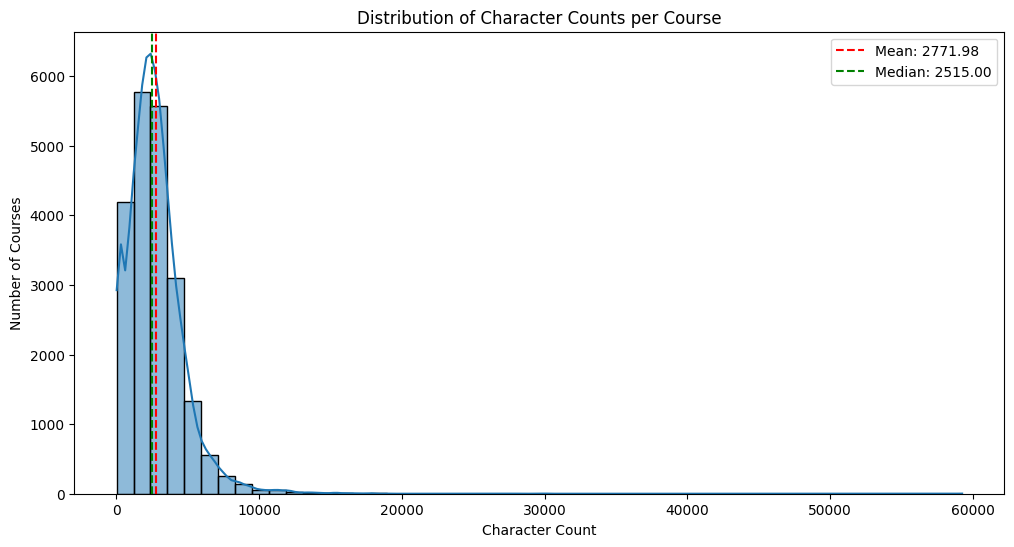

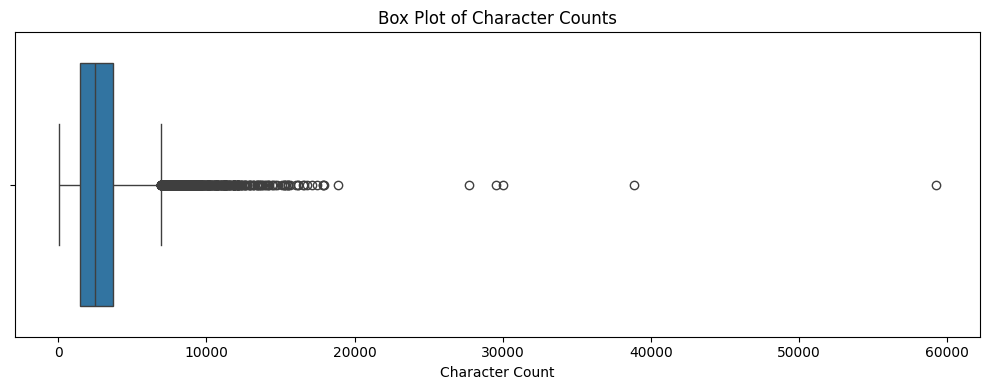

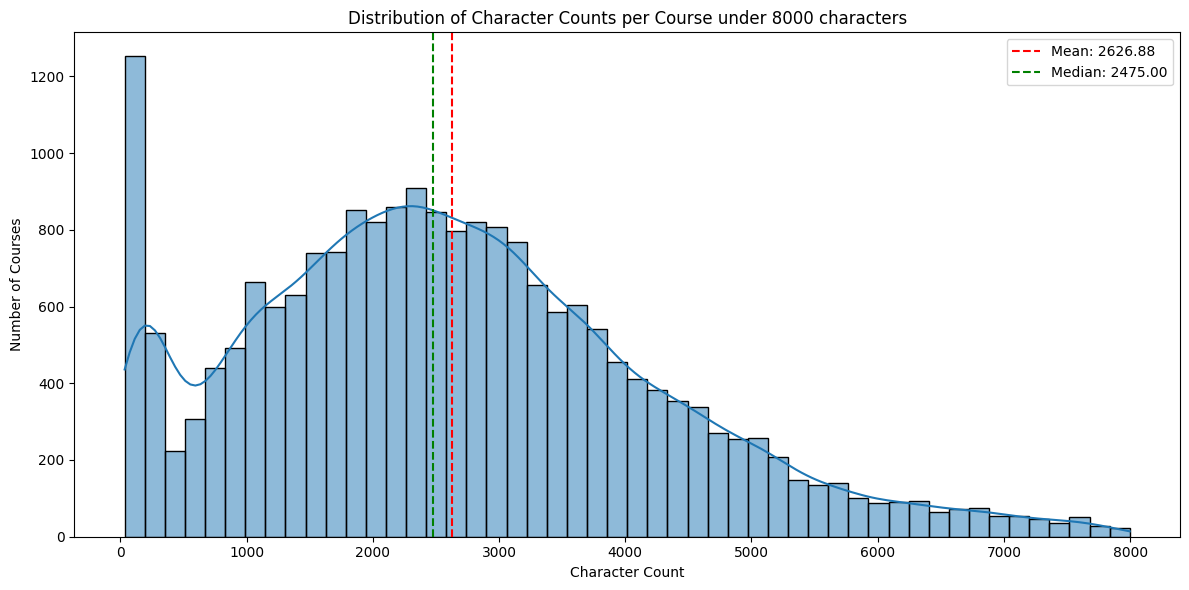

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

def analyze_character_counts(df):
    # Count the number of characters for each row in the dataframe
    def count_characters(row):
        total_chars = 0
        for value in row:
            if isinstance(value, str):
                total_chars += len(value)
        return total_chars
    
    # Create a new dataframe with only character counts
    char_counts = pd.DataFrame()
    
    # Apply the function to each row and create a column with the character count
    char_counts['char_count'] = df.drop(columns=['DESCRIPTION'], errors='ignore', axis=1).apply(count_characters, axis=1)
    
    # Get some statistics about the character counts
    print("\nCharacter count statistics:")
    print(f"Average characters per course: {char_counts['char_count'].mean():.2f}")
    print(f"Minimum characters: {char_counts['char_count'].min()}")
    print(f"Maximum characters: {char_counts['char_count'].max()}")
    print(f"Total characters across all courses: {char_counts['char_count'].sum()}")
    
    
    plt.figure(figsize=(12, 6))
    sns.histplot(char_counts['char_count'], bins=50, kde=True)
    plt.title('Distribution of Character Counts per Course')
    plt.xlabel('Character Count')
    plt.ylabel('Number of Courses')
    plt.axvline(char_counts['char_count'].mean(), color='r', linestyle='--', label=f'Mean: {char_counts["char_count"].mean():.2f}')
    plt.axvline(char_counts['char_count'].median(), color='g', linestyle='--', label=f'Median: {char_counts["char_count"].median():.2f}')
    plt.legend()
    
    # Box plot to show outliers
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=char_counts['char_count'])
    plt.title('Box Plot of Character Counts')
    plt.xlabel('Character Count')
    
    plt.tight_layout()
    plt.show()
    
    return char_counts

char_count = analyze_character_counts(df)

df_reduced = df.copy()
df_reduced["char_count"] = char_count["char_count"]
df_reduced = df_reduced[df_reduced["char_count"] <= 8000]


plt.figure(figsize=(12, 6))
sns.histplot(df_reduced['char_count'], bins=50, kde=True)
plt.title('Distribution of Character Counts per Course under 8000 characters')
plt.xlabel('Character Count')
plt.ylabel('Number of Courses')
plt.axvline(df_reduced['char_count'].mean(), color='r', linestyle='--', label=f'Mean: {df_reduced["char_count"].mean():.2f}')
plt.axvline(df_reduced['char_count'].median(), color='g', linestyle='--', label=f'Median: {df_reduced["char_count"].median():.2f}')
plt.legend()

plt.tight_layout()
plt.show()

Character count statistics by attribute:


,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
LITERATURE_chars,21106.0,714.952336,823.443120,0.0,132.0,514.0,1008.0,1666.0,2140.00,3729.90,12959.0
SYLLABUS_chars,21106.0,614.671515,862.839608,0.0,168.0,410.0,774.0,1356.0,1914.75,3715.90,54800.0
OBJECTIVES_chars,21106.0,397.292855,335.557224,0.0,169.0,328.0,535.0,834.0,1039.00,1545.95,3272.0
LEARNING_OUTCOMES_chars,21106.0,333.121908,298.168962,0.0,138.0,287.0,462.0,662.0,848.50,1333.95,3976.0
DESCRIPTION_chars,21106.0,313.215105,33.224129,59.0,293.0,315.0,335.0,353.0,365.00,388.00,442.0
ASSESMENT_METHODS_chars,21106.0,187.579456,303.799730,0.0,30.0,98.0,224.0,445.0,667.00,1405.85,8547.0
TEACHER_INFO_chars,21106.0,148.421255,552.665314,0.0,0.0,0.0,93.0,383.0,746.75,1981.85,22721.0
TEACHING_METHODS_chars,21106.0,100.139865,160.638787,0.0,20.0,52.0,117.0,238.0,356.00,721.00,4670.0
TEACHERS_chars,21106.0,52.905335,118.210629,0.0,12.0,28.0,58.0,114.0,165.00,324.95,5768.0
TEXT_PREREQUISITS_chars,21106.0,45.379655,107.012615,0.0,0.0,0.0,51.0,142.0,216.00,478.00,2176.0


None


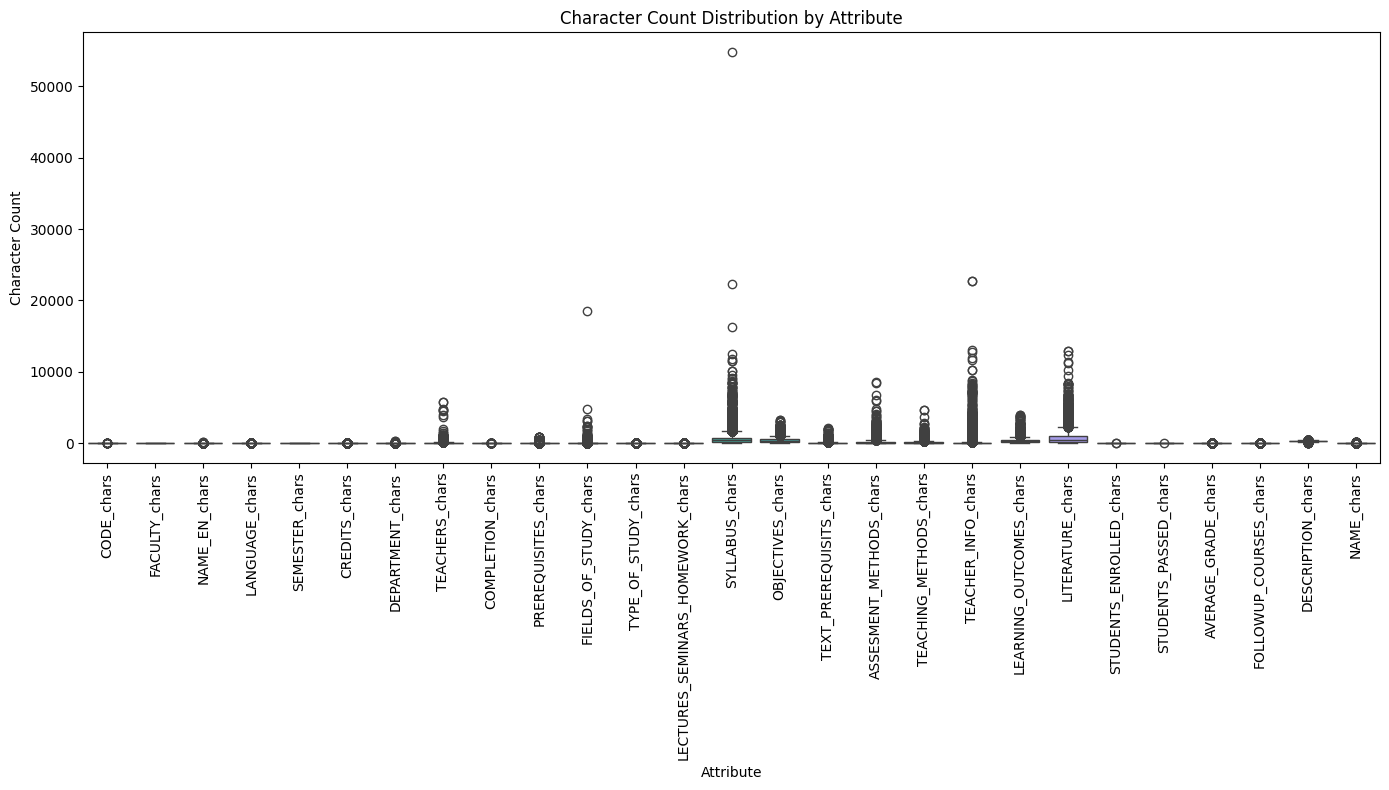

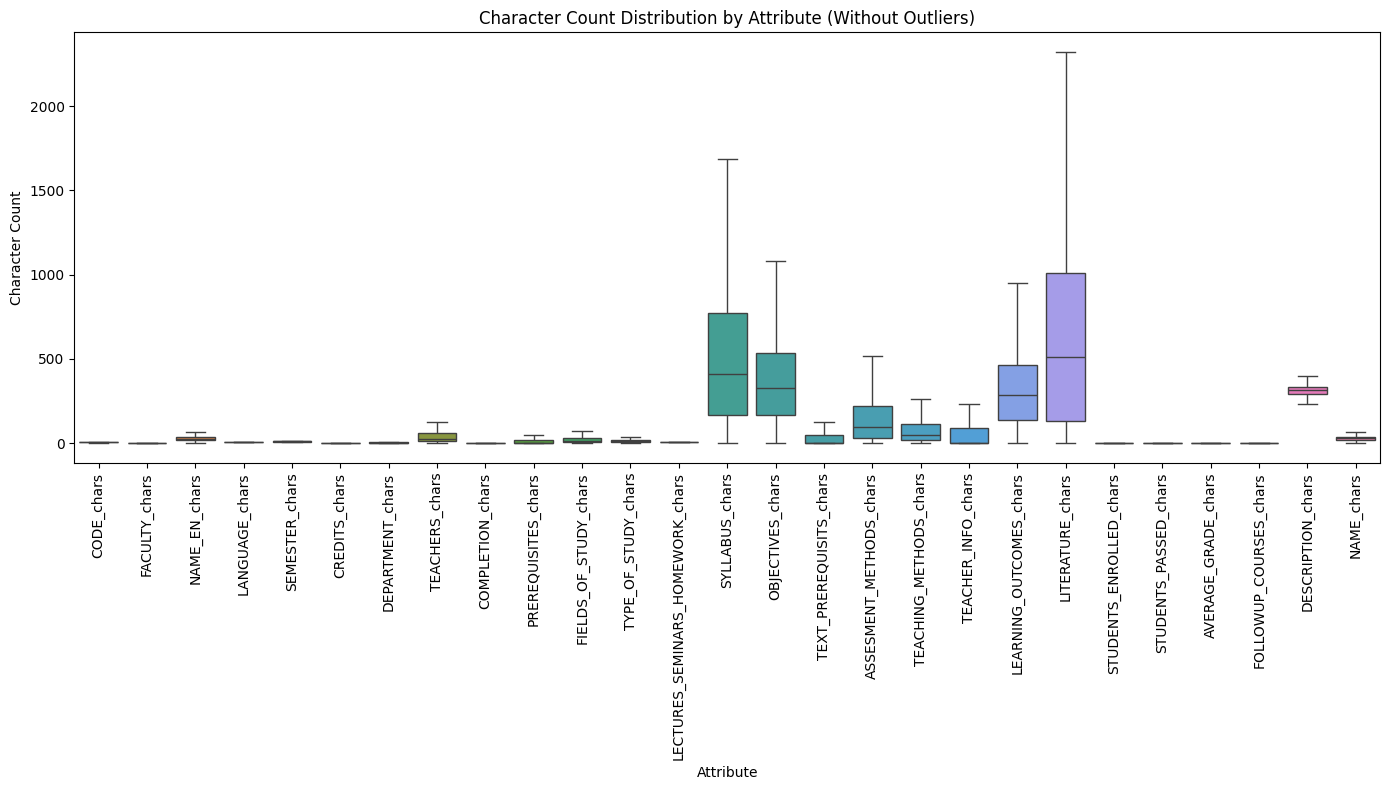

In [41]:
import pandas as pd

def analyze_attribute_character_counts(df):
    # Create a new dataframe to analyze character counts for each attribute
    attribute_char_counts = pd.DataFrame()

    # Get all string columns from the dataframe
    string_columns = df.select_dtypes(include=['object']).columns.tolist()

    # Calculate character count for each attribute
    for column in string_columns:
        try:
            # Skip columns that might contain non-string values or lists/dicts
            if column in ['KEYWORDS', 'RATINGS']:
                continue
                
            # Calculate character length for each cell in the column
            attribute_char_counts[f'{column}_chars'] = df[column].astype(str).apply(len)
        except Exception as e:
            print(f"Skipping column {column}: {e}")

    # Display basic statistics for each attribute's character count
    print("Character count statistics by attribute:")
    print(display(attribute_char_counts.describe(percentiles=[.25, .50, .75, .90, .95, .99]).T.sort_values(by='mean', ascending=False)))

    # Create a box plot to visualize the distribution of character counts by attribute
    plt.figure(figsize=(14, 8))
    sns.boxplot(data=attribute_char_counts)
    plt.title('Character Count Distribution by Attribute')
    plt.xlabel('Attribute')
    plt.ylabel('Character Count')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

    # Create a more focused box plot without outliers for better visibility
    plt.figure(figsize=(14, 8))
    sns.boxplot(data=attribute_char_counts, showfliers=False)
    plt.title('Character Count Distribution by Attribute (Without Outliers)')
    plt.xlabel('Attribute')
    plt.ylabel('Character Count')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

analyze_attribute_character_counts(df)

In [57]:
import re
import pandas as pd 

# Note: Accent removal is generally NOT recommended for text-embedding-004
# as it handles Unicode well and accents contain semantic information.
# This function assumes accents should be preserved.

# NOTE: temp
truncated_count = 0

def create_embedding_text(row):
    """
    Preprocesses relevant text fields from a DataFrame row to create
    a single structured string suitable for semantic embedding, applying
    truncation to potentially long fields.

    Args:
        row (pd.Series or dict-like): A row from a Pandas DataFrame
                                      containing course data.

    Returns:
        str: A structured string combining key textual fields for
             semantic embedding. Returns an empty string if no
             relevant text fields are found or if input is invalid.
    """
    if not isinstance(row, (pd.Series, dict)):
        raise ValueError("Input must be a Pandas Series or dictionary-like object.")

    # --- Configuration ---
    # Fields to combine into a single text block for semantic embedding
    # Ensure these column names match your DataFrame
    text_fields_for_embedding = [
        "NAME_EN",
        "OBJECTIVES",
        "SYLLABUS",
        "TEXT_PREREQUISITS",
        "LEARNING_OUTCOMES",
        "ASSESMENT_METHODS",
        "TEACHING_METHODS",
        "LITERATURE",
    ]

    # Use more descriptive headers for the embedding model
    field_headers = {
        "NAME_EN": "Course Name",
        "OBJECTIVES": "Course Objectives",
        "SYLLABUS": "Syllabus",
        "TEXT_PREREQUISITS": "Prerequisites Description",
        "DESCRIPTION": "Course Description",
        "LEARNING_OUTCOMES": "Learning Outcomes",
        "ASSESMENT_METHODS": "Assessment Methods",
        "TEACHING_METHODS": "Teaching Methods",
        "LITERATURE": "Recommended Literature",
    }

    # Define character limits for truncation (based on 95th/99th percentiles)
    # Fields not listed here will not be truncated.
    TRUNCATION_LIMITS = {
        "SYLLABUS": 3500,      
        "LITERATURE": 2500,     
        "OBJECTIVES": 1500,       
        "LEARNING_OUTCOMES": 1500, 
        "ASSESMENT_METHODS": 1500, 
        "TEXT_PREREQUISITS": 500,
        "TEACHING_METHODS": 750,
    }
    TRUNCATION_SUFFIX = "..."
    MAXIMUM_CHAR_COUNT = 8000

    # --- Processing ---
    embedding_text_parts = []
    global truncated_count

    for field in text_fields_for_embedding:
        # Safely get data from the row, handles missing columns/keys
        raw_text = row.get(field)

        # Check if text exists, is a string, and is not NaN before processing
        if isinstance(raw_text, str) and pd.notna(raw_text):
            # Clean whitespace: strip leading/trailing and replace multiple spaces/newlines with one
            cleaned_text = re.sub(r"\s+", " ", raw_text.strip())

            # Special cases
            if field == "LITERATURE":
                cleaned_text = cleaned_text.replace(" info", "")
            if field == "NAME_EN" and not cleaned_text:
                raw_name = row.get("NAME")
                if isinstance(raw_name, str) and pd.notna(raw_name):
                    cleaned_text = re.sub(r"\s+", " ", raw_name.strip())


            # Add to parts if there's non-empty content after cleaning
            if cleaned_text:
                header = field_headers.get(field, field) # Use defined header or the field name as fallback
                embedding_text_parts.append(f"{header}: {cleaned_text}")
        # You could add an else block here to log if a field is missing or not a string, if needed

    # 4. Check if total character count exceeds maximum limit
    # Calculate current total length
    current_total_length = sum(len(part) for part in embedding_text_parts)
    
    # If we're over the limit, we need to reduce text further
    if current_total_length > MAXIMUM_CHAR_COUNT:
        truncated_count += 1
        
        # First try to apply the predefined truncation limits to longer fields
        for i, part in enumerate(embedding_text_parts):
            # Extract the field name from the part (assuming format "Field Name: content")
            field = text_fields_for_embedding[i] if i < len(text_fields_for_embedding) else None
            
            if field in TRUNCATION_LIMITS:
                header = field_headers.get(field, field)
                header_length = len(header) + 2  # +2 for ": "
                content = part[header_length:]
                
                limit = TRUNCATION_LIMITS[field]
                if len(content) > limit:
                    # Truncate and add suffix
                    new_content = content[:limit - len(TRUNCATION_SUFFIX)] + TRUNCATION_SUFFIX
                    embedding_text_parts[i] = f"{header}: {new_content}"
        
        # Recalculate total length after initial truncation
        current_total_length = sum(len(part) for part in embedding_text_parts)
        
        # If still over the limit, proportionally reduce each field
        while current_total_length > MAXIMUM_CHAR_COUNT:
            # Find the longest part to reduce first
            longest_part_index = max(range(len(embedding_text_parts)), 
                                    key=lambda i: len(embedding_text_parts[i]))
            part = embedding_text_parts[longest_part_index]
            
            # Split into header and content
            header_end = part.find(": ") + 2
            header = part[:header_end]
            content = part[header_end:]
            
            # Reduce the content by 10% or at least 10 characters
            reduction = max(int(len(content) * 0.1), 10)
            # Make sure we don't reduce too much
            reduction = min(reduction, len(content) - 500)  # Keep at least 500 chars
            
            # Apply reduction
            if reduction > 0:
                new_content = content[:len(content) - reduction - len(TRUNCATION_SUFFIX)] + TRUNCATION_SUFFIX
                embedding_text_parts[longest_part_index] = header + new_content
            
            # Recalculate total length
            current_total_length = sum(len(part) for part in embedding_text_parts)
            
    if current_total_length < 200:
        field = "DESCRIPTION"
        embedding_text_parts.append(f"{field_headers.get(field, field)}: {row.get(field)}")
        current_total_length = len(embedding_text_parts[0])

    # Combine the text parts into a single string, separated by double newlines
    embedding_text = "\n\n".join(embedding_text_parts)

    return embedding_text



print("--- Text for Embedding (typical catalogue) ---")

print(create_embedding_text(df[df["CODE"] == "PV254"].iloc[0].to_dict()))

print()
print("--- Text for Embedding (empty catalogue) ---")

print(create_embedding_text(df[df["CODE"] == "BKJ_JZN2"].iloc[0].to_dict()))


--- Text for Embedding (typical catalogue) ---
Course Name: Recommender Systems

Course Objectives: The goal of the course is to familiarize students with basic techniques and problems in the field of recommender systems. The course is project based - students have practical experience with development of a simple recommender system or with a partial evaluation of a realistic recommender system.

Syllabus: Recommender systems, motivation, applications in different domains. Types of recommender systems: non-personalized, content based, collaborative filtering. Techniques and algorithms for recommender systems, particularly with focus on collaborative filtering (user-user, item-item, SVD). Evaluation: methodology, types of experiments, evaluation metrics, examples. Other aspects of recommender systems (e.g., explanations of recommendations, trust, attacts). Case studies (e.g., Amazon, Netflix, Google News, YouTube). Educational recommender systems, current research at Faculty of informat

Number of truncated values: 235
                  CODE                                     embedding_text
CODE                                                                     
A_SPT            A_SPT  Course Name: English for court translators and...
AUT_TM1        AUT_TM1  Course Name: Introduction to scheduling and ti...
BELONG          BELONG  Course Name: Professional Writing and Communic...
CJV_AJ_ESL  CJV_AJ_ESL  Course Name: English Speaking and Listening\n\...
CJV_A_KPed  CJV_A_KPed  Course Name: English for Department of Pedagog...

Character count statistics:
Average characters per course: 2459.38
Minimum characters: 125
Maximum characters: 8016
Total characters across all courses: 51907604


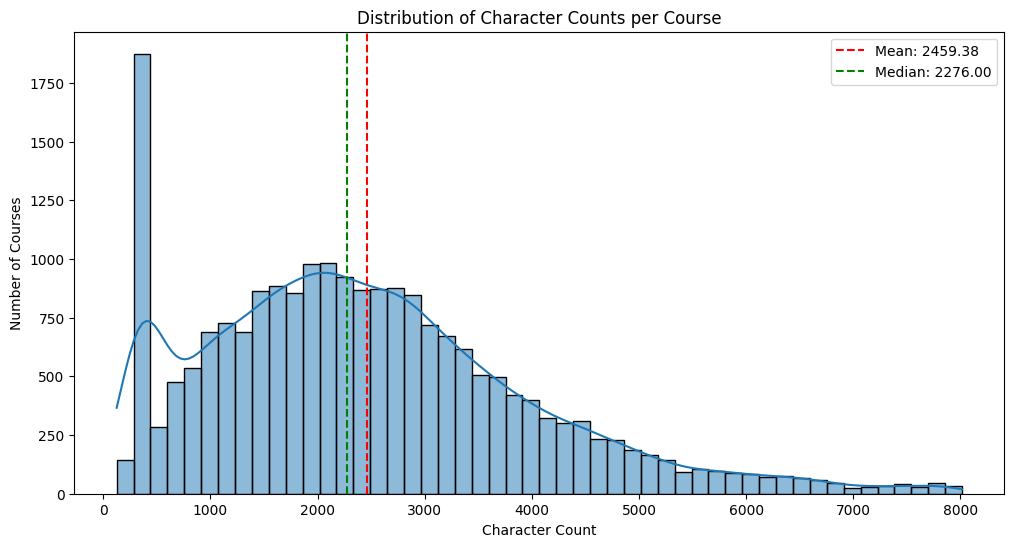

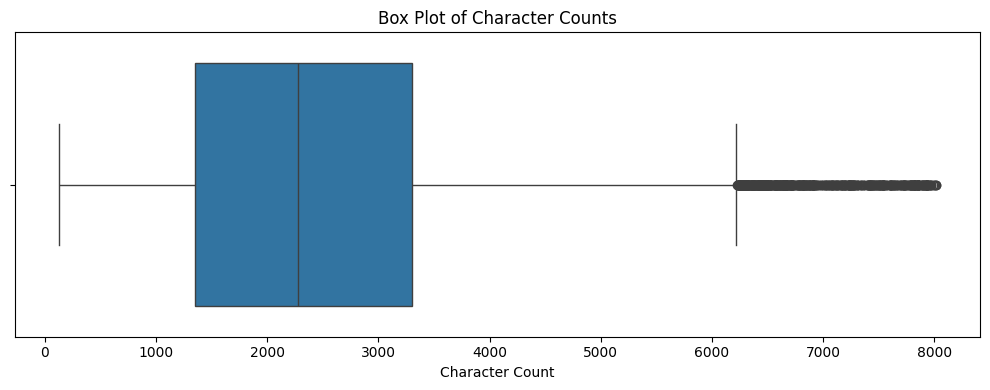


Top 20 courses by character count:
      CODE  char_count
  MPF_RDFT        8008
    Bi8110        8005
    MP220K        8001
 ZLVL7X61c        7988
    SZ6039        7984
   PSMA003        7966
  BPH_ZAFI        7964
   PSMA001        7957
    SPc070        7954
  BPP_OPR1        7946
    SPc802        7934
   PSMA023        7934
  UZAJ9999        7930
  MPP_PRFI        7929
  MPH_AOPR        7929
    CJCC06        7929
  VLVL7X61        7928
aVLVL9X65c        7923
    ISKB39        7920
    UCJL11        7915

Bottom 20 courses by embedding text length:
      CODE  char_count
   MVZs201         118
  SVL_SIKS         128
  CZV_ZAIM         135
   PSYs306         150
  ENSs4003         158
    XCZVSZ         163
  ENSs1002         165
   ZLUV011         168
  CJSZZ02B         175
    NARD42         195
    LO307Z         204
   SOCs502         207
 TIM_M_SZZ         208
u3v_VZKTLC         210
     Z8174         211
    NJ_001         212
     GS031         212
    NJ_002         212

In [43]:
embedding_df = df.copy()
truncated_count = 0
embedding_df["embedding_text"] = df.apply(create_embedding_text, axis=1)
print("Number of truncated values:", truncated_count)

embedding_df = embedding_df[['CODE', 'embedding_text']]
embedding_df.shape

print(embedding_df.head())

embedding_df["char_count"] = embedding_df["embedding_text"].apply(len)

analyze_character_counts(embedding_df)
embedding_df.describe(percentiles=[.25, .50, .75, .90, .95, .99, .999]).T

# Display the top 20 courses by character count
print("\nTop 20 courses by character count:")
top_20_by_chars = embedding_df.sort_values(by="char_count", ascending=False).head(20)
print(top_20_by_chars[["CODE", "char_count"]].to_string(index=False))

print("\nBottom 20 courses by embedding text length:")
bottom_20_by_chars = embedding_df.sort_values(by="char_count", ascending=True).head(20)
print(bottom_20_by_chars[["CODE", "char_count"]].to_string(index=False))

In [44]:
import google.generativeai as genai
import pandas as pd
import time
from tqdm.auto import tqdm  # For progress bar
import logging

import os
from dotenv import load_dotenv
load_dotenv()

# Retrieve the API key
GEMINI_API_KEY = os.getenv("GEMINI_API_KEY")
if not GEMINI_API_KEY:
    raise ValueError("GEMINI_API_KEY not found in environment variables. Please check your .env file.")


# Configure logging for better error tracking
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# --- Constants ---
MODEL_NAME = "models/text-embedding-004"
# Rate limit is 1500 queries/minute. A batch is one query.
# Google's API often has a limit of ~100 documents per batch request.
BATCH_SIZE = 100
RETRY_DELAY_SECONDS = 60  # 1 minute wait
MAX_RETRIES = 5

def generate_embeddings(df: pd.DataFrame, api_key: str) -> pd.DataFrame:
    """
    Generates embeddings for text data in a DataFrame using Google's API.

    Args:
        df (pd.DataFrame): Input DataFrame. Must have 'CODE' as the index
                           and an 'embedding_text' column containing the
                           text to be embedded.
        api_key (str): Your Google Generative AI API key.

    Returns:
        pd.DataFrame: A new DataFrame with 'CODE' and 'embedding' columns.
                      Returns an empty DataFrame if the input is empty or
                      if embedding generation fails completely after retries.

    Raises:
        ValueError: If the input DataFrame is missing the required structure.
        ImportError: If required libraries (pandas, google.generativeai, tqdm)
                     are not installed.
        Exception: Can raise exceptions from the Google API client during
                   configuration or embedding calls if retries fail.
    """
    if not isinstance(df.index, pd.Index) or df.index.name != 'CODE':
        raise ValueError("Input DataFrame must have 'CODE' set as the index.")
    if 'embedding_text' not in df.columns:
        raise ValueError("Input DataFrame must have an 'embedding_text' column.")
    if df.empty:
        logging.warning("Input DataFrame is empty. Returning an empty DataFrame.")
        return pd.DataFrame(columns=['CODE', 'embedding'])

    try:
        # Configure the Google API client
        genai.configure(api_key=api_key)
        logging.info(f"Configured Google AI Client. Using model: {MODEL_NAME}")
    except Exception as e:
        logging.error(f"Failed to configure Google AI Client: {e}")
        raise  # Re-raise the exception

    results = []
    codes_to_process = df.index.tolist()
    texts_to_process = df['embedding_text'].tolist()
    total_items = len(texts_to_process)

    logging.info(f"Starting embedding generation for {total_items} items "
                 f"with batch size {BATCH_SIZE}.")

    # Process in batches
    # Use tqdm for a progress bar over batches
    for i in tqdm(range(0, total_items, BATCH_SIZE), desc="Embedding Batches"):
        batch_codes = codes_to_process[i:min(i + BATCH_SIZE, total_items)]
        batch_texts = texts_to_process[i:min(i + BATCH_SIZE, total_items)]

        if not batch_texts: # Should not happen with correct range, but safety check
            continue

        logging.info(f"Processing batch {i//BATCH_SIZE + 1}/"
                     f"{ (total_items + BATCH_SIZE - 1)//BATCH_SIZE } "
                     f"(items {i+1}-{min(i + BATCH_SIZE, total_items)})")

        retries = 0
        embeddings_response = None
        success = False

        # Retry loop for the current batch
        while retries < MAX_RETRIES and not success:
            try:
                # Make the API call for the batch
                embeddings_response = genai.embed_content(
                    model=MODEL_NAME,
                    content=batch_texts,
                )

                # Validate response structure (simple check)
                if not embeddings_response or 'embedding' not in embeddings_response:
                     raise ValueError("Invalid response structure from API.")
                if len(embeddings_response['embedding']) != len(batch_texts):
                    raise ValueError(f"API returned {len(embeddings_response['embedding'])} embeddings, "
                                     f"but batch size was {len(batch_texts)}.")

                logging.debug(f"Successfully embedded batch starting with code: {batch_codes[0]}")
                success = True

            except Exception as e:
                retries += 1
                logging.warning(f"API call failed for batch starting with code: {batch_codes[0]}. "
                                f"Error: {e}. Retry {retries}/{MAX_RETRIES}...")
                if retries < MAX_RETRIES:
                    logging.info(f"Waiting {RETRY_DELAY_SECONDS} seconds before retrying...")
                    time.sleep(RETRY_DELAY_SECONDS)
                else:
                    logging.error(f"Max retries reached for batch starting with code: {batch_codes[0]}. "
                                  f"Skipping this batch.")
                    # Optionally: add failed codes to a separate list to report later

        # If successful, store the results
        if success and embeddings_response:
            batch_embeddings = embeddings_response['embedding']
            for code, embedding in zip(batch_codes, batch_embeddings):
                results.append({'CODE': code, 'embedding': embedding})

    logging.info(f"Finished processing {len(results)} items successfully.")

    # Create the final DataFrame
    if not results:
         logging.warning("No embeddings were successfully generated.")
         return pd.DataFrame(columns=['CODE', 'embedding'])

    output_df = pd.DataFrame(results)
    logging.info(f"Created output DataFrame with {len(output_df)} rows.")

    return output_df

RERUN_EMBEDDINGS = False
EMBEDDINGS_NAME = "embeddings_tomas_03.npy"
if RERUN_EMBEDDINGS:
    embedding_df = generate_embeddings(embedding_df, GEMINI_API_KEY)

    import os
    import numpy as np

    save_file = os.path.join("data", "embeddings", EMBEDDINGS_NAME)

    embeddings = np.array(embedding_df['embedding'].tolist())
    np.save(save_file, embeddings)
    print(f"Saved {len(embeddings)} embeddings to {save_file}")

In [45]:
# Load embeddings from the specified file
import numpy as np
import os
import logging

embeddings_file = os.path.join("data", "embeddings", "embeddings_tomas_02.npy")
#embeddings_file = os.path.join("data", "embeddings", "embeds_from_catalogue.npy")
embeddings = np.load(embeddings_file)

print(embeddings.shape)
print(df.shape)

(21106, 768)
(21106, 30)


In [46]:
def recommend_average(
    liked_codes: list[str],
    disliked_codes: list[str],
    skipped_codes: list[str],
    all_embeds: np.ndarray,
    courseClient,
    n: int = 10
) -> list[dict]:
    """
    Recommends courses based on the average of liked embeddings minus the average of disliked embeddings.
    
    Args:
        liked_codes: List of course codes that the user likes
        disliked_codes: List of course codes that the user dislikes
        skipped_codes: List of course codes to skip in recommendations
        all_embeds: Array of all course embeddings
        courseClient: Client for retrieving course information
        n: Number of recommendations to return
        
    Returns:
        List of recommended courses with similarity scores
    """
    # Get indices of liked and disliked courses
    liked_indices = [i for i, code in enumerate(df['CODE']) if code in liked_codes]
    disliked_indices = [i for i, code in enumerate(df['CODE']) if code in disliked_codes]
    
    # Skip empty sets
    if not liked_indices:
        logging.warning("No liked courses found in the dataset")
        return []
    
    # Calculate average embeddings
    liked_avg = np.mean(all_embeds[liked_indices], axis=0)
    
    # If there are disliked courses, subtract their average from the liked average
    if disliked_indices:
        disliked_avg = np.mean(all_embeds[disliked_indices], axis=0)
        target_embedding = liked_avg - disliked_avg*0.5
    else:
        target_embedding = liked_avg
    
    # Calculate Euclidean distances
    distances = np.linalg.norm(all_embeds - target_embedding, axis=1)
    
    # Create a list of (index, distance) tuples and sort by distance (ascending)
    indices_with_distances = [(i, dist) for i, dist in enumerate(distances)]
    indices_with_distances.sort(key=lambda x: x[1])
    
    # Filter out liked, disliked, and skipped courses
    excluded_codes = set(liked_codes + disliked_codes + skipped_codes)
    recommendations = []
    
    for i in range(len(indices_with_distances)):
        if len(recommendations) >= n:
            break
            
        idx, distance = indices_with_distances[i]
        code = df['CODE'].iloc[idx]
        if code in excluded_codes:
            continue
        course = courseClient.get_course_by_code(code)
        if not course:
            continue

        # Convert distance to similarity (lower distance = higher similarity)
        similarity = 1.0 / (1.0 + distance)  # Simple conversion to a 0-1 scale
        course.SIMILARITY = similarity
        recommendations.append(course)
    
    return recommendations


In [47]:
from app.recommend.embeddings import recommend_courses

LIKED_CODES = ["PV197", "IB031", "CORE047"]
DISLIKED_CODES = ["MB151", "MB152", "MB154"]
SKIPPED_CODES = []

# Get recommendations using the standard method
rec_courses = recommend_courses(
    liked_codes=LIKED_CODES,
    disliked_codes=DISLIKED_CODES,
    skipped_codes=SKIPPED_CODES,
    all_embeds=embeddings,
    courseClient=course_client,
    n=10
)
rec_df = pd.DataFrame(rec_courses)

# Get recommendations using the average method
rec_courses_avg = recommend_average(
    liked_codes=LIKED_CODES,
    disliked_codes=DISLIKED_CODES,
    skipped_codes=SKIPPED_CODES,
    all_embeds=embeddings,
    courseClient=course_client,
    n=10
)
rec_avg_df = pd.DataFrame(rec_courses_avg)

# Display both side by side
print("Standard recommendation method:")
display(rec_df[["CODE", "FACULTY", "NAME"]].style.set_properties(**{'text-align': 'left'}))

print("\nAverage embedding recommendation method:")
display(rec_avg_df[["CODE", "FACULTY", "NAME"]].style.set_properties(**{'text-align': 'left'}))


Standard recommendation method:


,CODE,FACULTY,NAME
0,XV004,PřF,Od nápadu k podnikání
1,BKM_OPRO,ESF,Optimalizace a rozhodování
2,BKM_DAMI,ESF,Datamining
3,PV115,FI,Laboratoř dobývání znalostí
4,M5170,PřF,Matematické programování
5,E0034,PřF,Analýza a klasifikace dat
6,F1400,PřF,Programování
7,PV242,FI,Inovace a podnikání
8,MPH_EVPP,ESF,Empirický výzkum pro podnikovou praxi
9,PV021,FI,Neural Networks



Average embedding recommendation method:


,CODE,FACULTY,NAME
0,XV004,PřF,Od nápadu k podnikání
1,PV242,FI,Inovace a podnikání
2,Bi9680en,PřF,"Artificial Intelligence in Biology, Chemistry, and Bioengineering"
3,PV115,FI,Laboratoř dobývání znalostí
4,PA164,FI,Machine learning and natural language processing
5,PV227,FI,GPU Rendering
6,PA228,FI,Machine Learning in Image Processing
7,MPH_PODN,ESF,Podnikání
8,BKM_DAMI,ESF,Datamining
9,MKH_PODN,ESF,Business
